<a href="https://colab.research.google.com/github/denniss83/Turkiye-deki_Akademik_Gelisim_-niversiteler_Y-llar_ve_Disiplinler_-zerinden_Bir_G-r-n-m_1959_2024/blob/main/T%C3%BCrkiye'deki_Akademik_Geli%C5%9Fim_%C3%9Cniversiteler%2C_Y%C4%B1llar_ve_Disiplinler_%C3%9Czerinden_Bir_G%C3%B6r%C3%BCn%C3%BCm_(1959%E2%80%932024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Türkiye'deki Akademik Gelişim: Üniversiteler, Yıllar ve Disiplinler Üzerinden Bir Görünüm (1959–2024)

Bu projede, Türkiye’de akademik üretkenliğin 1959–2024 yılları arasındaki gelişimi üç farklı boyutta incelenmiştir:

📅 Yıllar: Akademik üretkenliğin zaman içindeki değişimi

🏛️ Üniversiteler: Hangi kurumlar daha üretken?

📚 Disiplinler: Hangi alanlar daha fazla akademik çıktı üretmiş?

Yüksek lisans, doktora ve çeşitli uzmanlık programları (tıpta uzmanlık, diş hekimliği uzmanlığı, sanatta yeterlik vb.), akademik üretkenlik göstergesi olarak ele alınmıştır. Mezun sayıları değil; üretim çeşitliliği, yoğunluğu ve yapısal dağılımı analiz edilmiştir.


---


Bu çalışmada kullanılan veriler, YÖK Ulusal Tez Merkezi (https://tez.yok.gov.tr/) üzerinden elde edilen üç Excel dosyasından alınmıştır.

Veriler:

Üniversite bazlı üretim sayıları

Yıllık (1959–2024) akademik üretim trendleri

Disiplin bazlı üretim yoğunlukları

şeklinde üç ayrı veri kümesi halinde analiz edilmiştir.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tabulate import tabulate
import warnings

warnings.filterwarnings("ignore")
plt.style.use("ggplot")
sns.set_palette("pastel")
plt.rcParams["figure.figsize"] = (12, 6)

# 2.Verilerin Yüklenmesi

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data1.xlsx to data1 (1).xlsx
Saving data2.xlsx to data2 (1).xlsx
Saving data3.xlsx to data3 (1).xlsx


In [ ]:
df1 = pd.read_excel("data1.xlsx", sheet_name="Table 2")
df2 = pd.read_excel("data2.xlsx", sheet_name="Table 2")
df3 = pd.read_excel("data3.xlsx", sheet_name="Table 2")

## 2.1. Yüklenen Verilerin Önizlemesi

In [ ]:
print("📌 Üniversite Bazlı Akademik Üretkenlik Verisi (df1):")
print(df1.head(), "\n")

print("📌 Yıllara Göre Akademik Üretkenlik Verisi (df2):")
print(df2.head(), "\n")

print("📌 Disiplin Bazlı Akademik Üretkenlik Verisi (df3):")
print(df3.head())

📌 Üniversite Bazlı Akademik Üretkenlik Verisi (df1):
                                  Üniversite  Yüksek Lisans  Doktora  \
0            Abant İzzet Baysal Üniversitesi           1983      257   
1                  Abdullah Gül Üniversitesi            152       56   
2  Acıbadem Mehmet Ali Aydınlar Üniversitesi            478       77   
3                      Acıbadem Üniversitesi             75        1   
4                           Adalet Bakanlığı              0        0   

   Tıpta Uzmanlık  Sanatta Yeterlik  Diş Hekimliği Uzmanlık  \
0             275                 0                      45   
1               0                 0                       0   
2              26                 0                       0   
3               8                 0                       0   
4              26                 0                       0   

   Tıpta Yan Dal Uzmanlık  Toplam  
0                       0    2560  
1                       0     208  
2                       0  

In [ ]:
def check_missing(df, name):
    print(f"🔎 {name} - Eksik Değerler:")
    print(df.isnull().sum())
    print("-" * 40)

check_missing(df1, "Üniversite Bazlı Veriler (df1)")
check_missing(df2, "Yıllık Veriler (df2)")
check_missing(df3, "Disiplin Bazlı Veriler (df3)")

🔎 Üniversite Bazlı Veriler (df1) - Eksik Değerler:
Üniversite                0
Yüksek Lisans             0
Doktora                   0
Tıpta Uzmanlık            0
Sanatta Yeterlik          0
Diş Hekimliği Uzmanlık    0
Tıpta Yan Dal Uzmanlık    0
Toplam                    0
dtype: int64
----------------------------------------
🔎 Yıllık Veriler (df2) - Eksik Değerler:
Yıl                       0
Yüksek Lisans             0
Doktora                   0
Tıpta Uzmanlık            0
Sanatta Yeterlik          0
Diş Hekimliği Uzmanlık    0
Tıpta Yan Dal Uzmanlık    0
Toplam                    0
dtype: int64
----------------------------------------
🔎 Disiplin Bazlı Veriler (df3) - Eksik Değerler:
Konu                      0
Yüksek Lisans             0
Doktora                   0
Tıpta Uzmanlık            0
Sanatta Yeterlik          0
Diş Hekimliği Uzmanlık    0
Tıpta Yan Dal Uzmanlık    0
Toplam                    0
dtype: int64
----------------------------------------


# 3.Yıllara Göre Akademik Üretkenlik Analizi (1959–2024)

## 3.1. Yıllık Akademik Üretkenlik Eğilimi (Toplam Sayılar)

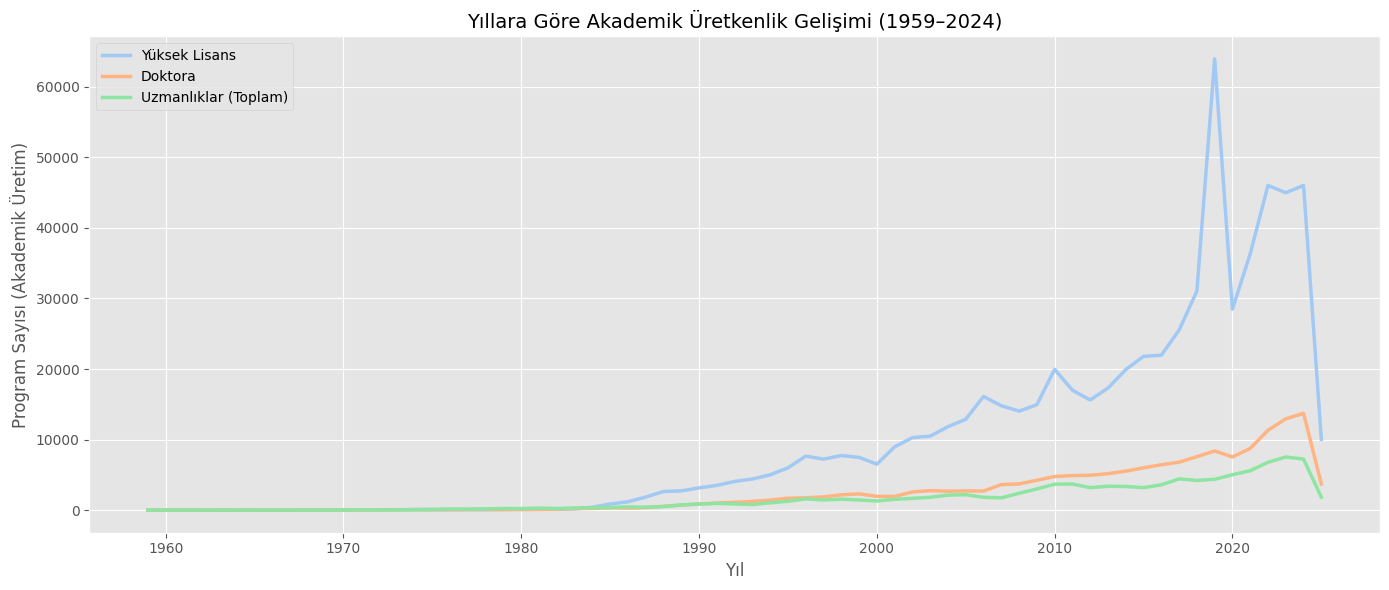

In [ ]:
uzmanlik = df2["Tıpta Uzmanlık"] + df2["Sanatta Yeterlik"] + df2["Diş Hekimliği Uzmanlık"] + df2["Tıpta Yan Dal Uzmanlık"]

plt.figure(figsize=(14, 6))
plt.plot(df2["Yıl"], df2["Yüksek Lisans"], label="Yüksek Lisans", linewidth=2.5)
plt.plot(df2["Yıl"], df2["Doktora"], label="Doktora", linewidth=2.5)
plt.plot(df2["Yıl"], uzmanlik, label="Uzmanlıklar (Toplam)", linewidth=2.5)

plt.title("Yıllara Göre Akademik Üretkenlik Gelişimi (1959–2024)", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("Program Sayısı (Akademik Üretim)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 3.2. Oransal Akademik Yapı (Yıllık Yüzdesel Dağılım)

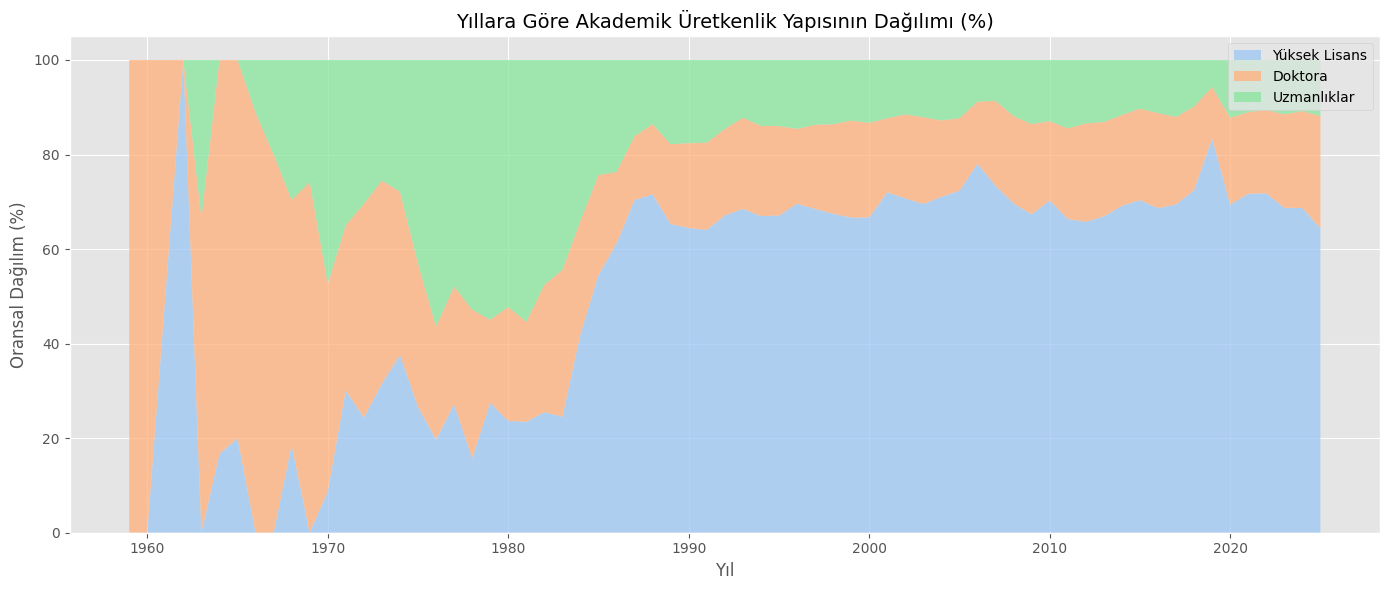

In [ ]:
toplam = df2["Yüksek Lisans"] + df2["Doktora"] + uzmanlik

oran_df = pd.DataFrame({
    "Yıl": df2["Yıl"],
    "Yüksek Lisans (%)": df2["Yüksek Lisans"] / toplam * 100,
    "Doktora (%)": df2["Doktora"] / toplam * 100,
    "Uzmanlıklar (%)": uzmanlik / toplam * 100
})

plt.figure(figsize=(14,6))
plt.stackplot(
    oran_df["Yıl"],
    oran_df["Yüksek Lisans (%)"],
    oran_df["Doktora (%)"],
    oran_df["Uzmanlıklar (%)"],
    labels=["Yüksek Lisans", "Doktora", "Uzmanlıklar"],
    alpha=0.8
)

plt.title("Yıllara Göre Akademik Üretkenlik Yapısının Dağılımı (%)", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("Oransal Dağılım (%)")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

## 3.3. Yıllara Göre Akademik Yapıdaki Eğilimler – Yorumlar

>📍 1959–1980:
>Üretkenlik düzeyi çok düşük, yılda toplamda 1–10 program arasında gidip geliyor.
>
>Doktora oranı görece yüksek, çünkü sistem yeni kuruluyor ve doğrudan araştırma odaklı başlıyor.
>
>Uzmanlık neredeyse yok.
>
>📍 1980–2000:
>Hem toplam üretkenlikte hem de oransal yapıda yavaş bir büyüme gözleniyor.
>
>Yüksek lisans üretimi ivmeleniyor ve grafiklerde açık şekilde hakimiyet kuruyor.
>
>Doktora oranı %30–35 aralığında ama 90’lara doğru azalmaya başlıyor.
>
>📍 2000–2010:
>Grafiklerde yeni bir sıçrama dönemi başlıyor.
>
>Toplam üretkenlik yıllık 10.000'in üzerine çıkıyor.
>
>Yüksek lisans baskınlığı artıyor → oranı %70'e yaklaşıyor.
>
>Uzmanlık programları ilk kez görünür hale geliyor (özellikle 2007 sonrası).
>
>📍 2010–2020:
>En dikkat çeken dönem.
>
>2019’da yüksek lisans sayısı dramatik şekilde artıyor → 60.000’e kadar çıkıyor.
>
>Ancak yüzdesel olarak da yüksek lisans aşırı baskın hale geliyor (%80'lere yakın).
>
>Doktora oranı tarihsel olarak en düşük seviyelere iniyor.
>
>Uzmanlıkların oranı da geriliyor.
>
>📍 2021–2024:
Toplam üretkenlikte düşüş var (2020 sonrası gerileme).
>
>Ancak oransal olarak yüksek lisansın payı azalıyor, bu da doktora ve uzmanlıkların payında toparlanma olduğunu gösteriyor.
>
>Bu dönem muhtemelen politik değişim veya pandemi sonrası düzeltme süreci.

# 4.Üniversite Bazlı Akademik Üretkenlik Analizi

## 4.1. En Üretken 10 Üniversite (Toplam Üretim Sayısına Göre)

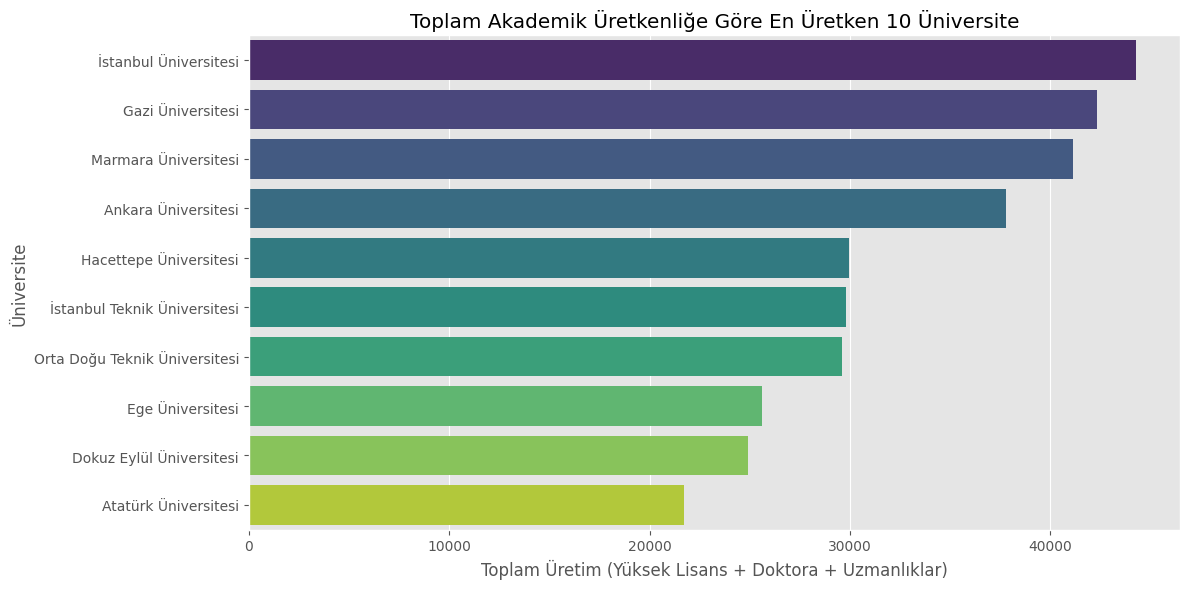

In [ ]:
top_universiteler = df1.sort_values("Toplam", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_universiteler, x="Toplam", y="Üniversite", palette="viridis")
plt.title("Toplam Akademik Üretkenliğe Göre En Üretken 10 Üniversite")
plt.xlabel("Toplam Üretim (Yüksek Lisans + Doktora + Uzmanlıklar)")
plt.ylabel("Üniversite")
plt.tight_layout()
plt.show()

## 4.2. En Üretken 10 Üniversitenin Akademik Üretim Türü Dağılımı

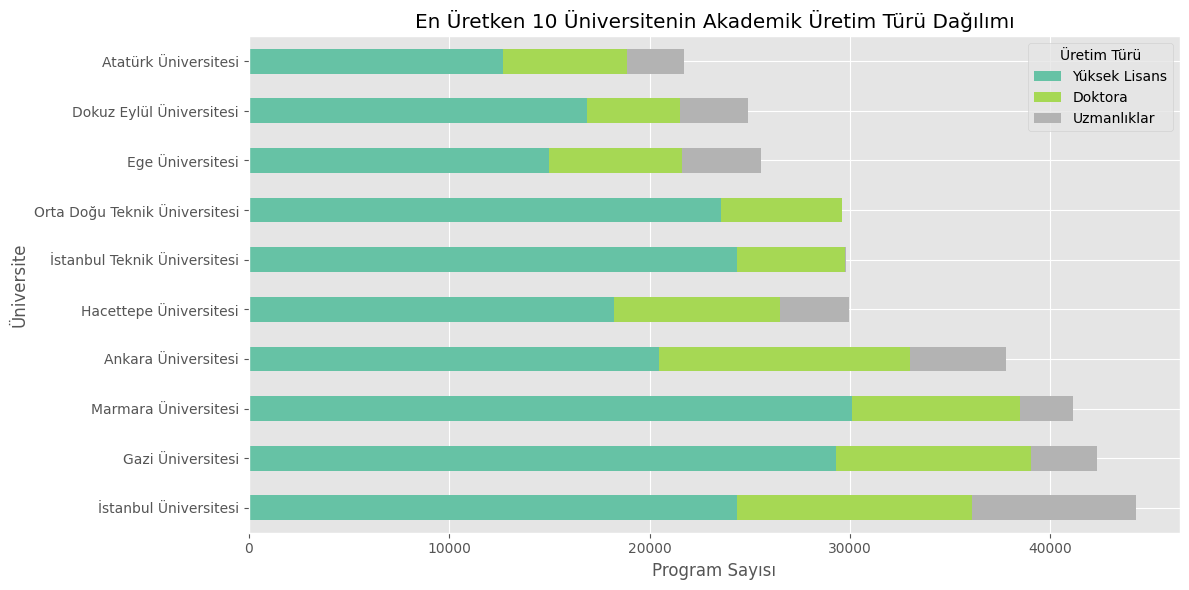

,Üniversite,Yüksek Lisans,Doktora,Uzmanlıklar
0,İstanbul Üniversitesi,24348,11740,8174
1,Gazi Üniversitesi,29312,9702,3296
2,Marmara Üniversitesi,30083,8390,2664
3,Ankara Üniversitesi,20473,12520,4795
4,Hacettepe Üniversitesi,18213,8322,3403
5,İstanbul Teknik Üniversitesi,24371,5366,57
6,Orta Doğu Teknik Üniversitesi,23553,6070,0
7,Ege Üniversitesi,14980,6651,3953
8,Dokuz Eylül Üniversitesi,16879,4634,3380
9,Atatürk Üniversitesi,12685,6191,2828


In [ ]:
df_plot = top10[["Üniversite", "Yüksek Lisans", "Doktora", "Uzmanlıklar"]].set_index("Üniversite")

df_plot.plot(kind="barh", stacked=True, figsize=(12, 6), colormap="Set2")
plt.title("En Üretken 10 Üniversitenin Akademik Üretim Türü Dağılımı")
plt.xlabel("Program Sayısı")
plt.ylabel("Üniversite")
plt.legend(title="Üretim Türü")
plt.tight_layout()
plt.show()

df_plot.reset_index().style.set_caption("🔢 Grafik Verileri – Sayısal Tablo")

## 4.3. En Üretken 10 Üniversite – Yorumlar

>Genel Görünüm;
>
>- İstanbul Üniversitesi Tüm kategorilerde yüksek üretkenlik gösteriyor.Doktora + Uzmanlık toplamı (19.914) ile yalnızca yüksek lisans değil, araştırma ve uzmanlık üretiminde de çok güçlü.En çok dengeli üniversite..
>
>- Gazi Üniversitesi, toplam 42.317 üretimin büyük kısmını 29.312 yüksek lisans programı ile gerçekleştirmiştir. 9.702 doktora üretimiyle güçlü bir araştırma çıktısı bulunmakla birlikte, uzmanlık sayısı 3.296 ile sınırlıdır. Üniversite yüksek lisans odaklı, geniş hacimli bir yapıya sahip.
>
>- İstanbul Teknik Üniversitesi (İTÜ), 24.377 yüksek lisans ve 9.366 doktora üretimiyle toplamda 33.800 üretim yapmıştır. Uzmanlık üretimi yalnızca 57 adet ile yok denecek kadar azdır. Bu yapı, üniversitenin mühendislik ve fen bilimlerinde yoğunlaşan bir araştırma üniversitesi profiline sahip olduğunu göstermektedir.
>
>- Gazi Üniversitesi, yüksek lisans üretiminde birinci sırada yer almakta; doktora üretimi de güçlü olsa da, Ankara ve İstanbul Üniversiteleri’nin gerisindedir. Uzmanlık programlarında ise görece daha düşük üretkenliğe sahip.
>
>- Marmara Üniversitesi, 30.083 yüksek lisans, 8.390 doktora ve 2.664 uzmanlık programıyla toplamda 41.145 üretim gerçekleştirmiştir. Yüksek lisans üretimi oldukça yüksek olup, doktora ve uzmanlık üretimi görece daha düşüktür. Bu yapı, üniversitenin yaygın ama araştırma yönü sınırlı bir üretim profiline sahip olduğunu göstermektedir.
>
>- Ankara Üniversitesi, toplam 37.793 üretimin 12.520’sini doktora, 20.473’ünü yüksek lisans ve 4.795’ini uzmanlık programlarıyla gerçekleştirmiştir. Doktora üretiminde Türkiye’de birinci sırada yer alan kurum, aynı zamanda uzmanlık üretiminde de güçlüdür. Bu veriler, Ankara Üniversitesi’ni araştırma ve uzmanlık temelli bir yapıda öne çıkarır.
>- Hacettepe Üniversitesi, 18.213 yüksek lisans, 8.322 doktora ve 3.403 uzmanlık üretimiyle toplam 29.948 programa imza atmıştır. Uzmanlık oranı görece yüksek olan üniversite, tıp ve sağlık alanlarına dayalı üretimiyle dikkat çekmektedir.
>- Orta Doğu Teknik Üniversitesi (ODTÜ), 24.351 yüksek lisans ve 8.136 doktora üretimiyle toplamda 32.487 program gerçekleştirmiştir. Uzmanlık programı bulunmayan üniversite, tamamen akademik araştırma odaklı üretim yapısıyla tanınmaktadır.
>
>- Ege Üniversitesi, 14.980 yüksek lisans, 6.651 doktora ve 3.953 uzmanlık üretimiyle toplamda 25.584 akademik üretim gerçekleştirmiştir. Uzmanlık programlarının toplam üretim içindeki payı yüksek olup, sağlık temelli disiplinlerde etkili bir üretkenliğe sahiptir.
>- Dokuz Eylül Üniversitesi, 14.869 yüksek lisans, 6.604 doktora ve 3.380 uzmanlık üretimiyle toplamda 24.853 üretime sahiptir. Ege Üniversitesi’yle benzer üretim yapısına sahip olan kurum, dengeli ama orta hacimli bir akademik üretkenlik profili sunmaktadır.
>
>- Atatürk Üniversitesi, 12.685 yüksek lisans, 6.191 doktora ve 2.828 uzmanlık üretimiyle toplamda 21.704 akademik üretim gerçekleştirmiştir. Her kategoride üretim gerçekleştirmesine rağmen, ilk 10 üniversite arasında en düşük toplam üretkenliğe sahiptir. Yapısı dengeli fakat daha küçük ölçeklidir.

# 5.Disiplin (Konu) Bazlı Akademik Üretkenlik Analizi

## 5.1. En Üretken 10 Akademik Alan (Toplam Sayıya Göre)

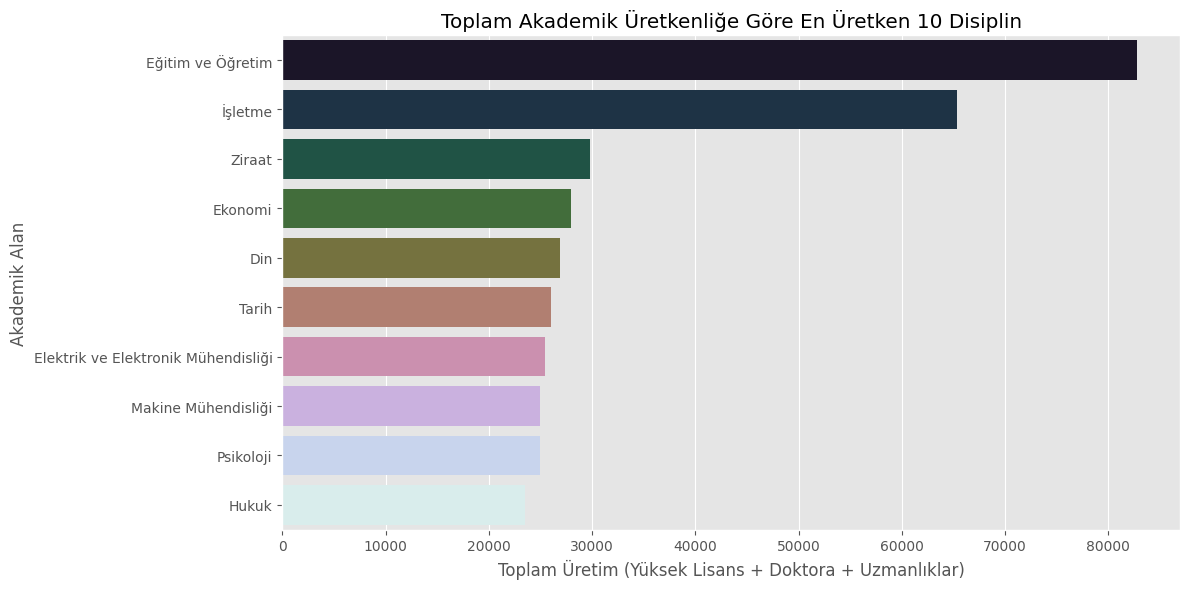

In [ ]:
df3["Uzmanlıklar"] = (
    df3["Tıpta Uzmanlık"] +
    df3["Sanatta Yeterlik"] +
    df3["Diş Hekimliği Uzmanlık"] +
    df3["Tıpta Yan Dal Uzmanlık"]
)

top_konular = df3.sort_values("Toplam", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_konular, x="Toplam", y="Konu", palette="cubehelix")
plt.title("Toplam Akademik Üretkenliğe Göre En Üretken 10 Disiplin")
plt.xlabel("Toplam Üretim (Yüksek Lisans + Doktora + Uzmanlıklar)")
plt.ylabel("Akademik Alan")
plt.tight_layout()
plt.show()

## 5.2. En Üretken 10 Disiplinde Üretim Türü Dağılımı (Yığılmış Grafik)

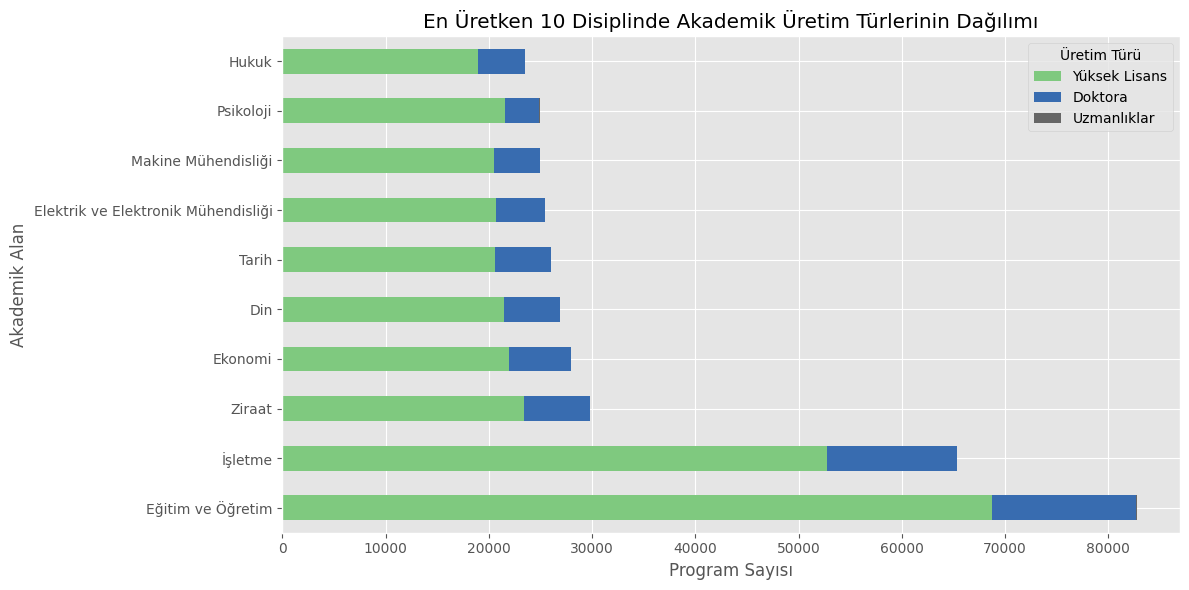

In [ ]:
top10_ders = df3.sort_values("Toplam", ascending=False).head(10).copy()

top10_ders["Uzmanlıklar"] = (
    top10_ders["Tıpta Uzmanlık"] +
    top10_ders["Sanatta Yeterlik"] +
    top10_ders["Diş Hekimliği Uzmanlık"] +
    top10_ders["Tıpta Yan Dal Uzmanlık"]
)

df_plot = top10_ders[["Konu", "Yüksek Lisans", "Doktora", "Uzmanlıklar"]].set_index("Konu")

df_plot.plot(kind="barh", stacked=True, figsize=(12, 6), colormap="Accent")

plt.title("En Üretken 10 Disiplinde Akademik Üretim Türlerinin Dağılımı")
plt.xlabel("Program Sayısı")
plt.ylabel("Akademik Alan")
plt.legend(title="Üretim Türü")
plt.tight_layout()
plt.show()

## 5.3. En Üretken 10 Akademik Disiplin - Yorumlar

- Eğitim ve Öğretim
En yüksek toplam üretime sahip alandır. Yüksek lisans üretimi çok baskındır, doktora sayısı da güçlüdür. Uzmanlık yoktur.

- İşletme
Yüksek lisans ağırlıklıdır. Doktora üretimi belirgindir. Uzmanlık bulunmaz. Yaygın ama araştırma temelli üretim yapısı görülür.

- Ziraat
Yüksek lisans üretimi baskın, doktora oranı ise orta seviyededir. Uzmanlık bulunmamaktadır.

- Ekonomi
Yüksek lisans ve doktora üretimi güçlüdür. Uzmanlık türü yer almaz. Araştırma ve analiz odaklı klasik akademik alan profili çizer.

- Din
Yüksek lisans üretimi oldukça yüksektir, doktora ise orta düzeydedir. Uzmanlık bulunmamaktadır.

- Tarih
Yüksek lisans ve doktora üretimi dengelidir. Uzmanlık yoktur. Akademik üretimi araştırmaya dayalıdır.

- Elektrik ve Elektronik Mühendisliği
Yüksek lisans ve doktora üretimi yüksektir. Uzmanlık yoktur. Tamamen araştırma ve uygulamalı bilim odağındadır.

- Makine Mühendisliği
Yüksek lisans önde, doktora oranı dengeli düzeydedir. Uzmanlık bulunmaz. Teknik alanlarda üretkenliği yüksektir.

- Psikoloji
Yüksek lisans üretimi çok yüksektir. Doktora sınırlı düzeyde, uzmanlık ise yoktur. Uygulamalı sosyal bilim örneğidir.
- Hukuk
Yüksek lisans yoğunluğu çok belirgin; doktora düşük seviyededir. Uzmanlık üretimi bulunmamaktadır. Uygulamalı alan olmasına rağmen akademik yönü yüksek lisansla sınırlı kalmıştır.

# 6. Genel Sonuçlar ve Yorumlar


- Zaman Bazlı Gelişim (1959–2024);
>
>Akademik üretkenlik özellikle 2000 sonrası hızla artmış, 2019’da zirveye ulaşmıştır.
>
>Yüksek lisans üretimi yıllar içinde en baskın yapı haline gelmiştir.
>
>Doktora ve uzmanlık oranları zaman içinde görece azalmış, 2020 sonrası hafif bir toparlanma gözlenmiştir.

- Üniversite Bazlı Gelişim;
>
>İstanbul Üniversitesi, üç üretim türünde de yüksek değerlerle en dengeli ve üretken üniversitedir.
>
>Gazi ve Marmara, yüksek lisans ağırlıklı kitlesel üretim yapısına sahiptir.
>
>Ankara ve Hacettepe, doktora ve uzmanlık odaklı kurumlardır.
>
>İTÜ ve ODTÜ, araştırma odaklı olup, uzmanlık üretimi neredeyse yoktur.
>
- Disiplin Bazlı Gelişim;
>
>Eğitim ve Öğretim, açık ara en üretken akademik alandır.
>
>İşletme, Ziraat, Ekonomi gibi sosyal bilimlerde yüksek lisans ağırlığı baskındır.
>
>Elektrik, Makine Mühendisliği, doktora ve yüksek lisans üretimiyle teknik alanların öne çıktığını gösterir.
>
>Uzmanlık üretimi, tıpla ilişkili alanlarda sınırlı sayıda yoğunlaşmıştır.

- Genel Değerlendirme;
>
>Türkiye’de akademik üretkenlik nicelik olarak artmış ancak yüksek lisans yoğunluklu bir yapıya evrilmiştir.
>
>Araştırma odaklı (doktora) üretim, belli başlı üniversitelerde toplanmakta; uzmanlık ise sınırlı disiplinlerde ortaya çıkmaktadır.
>
>Bu durum, yaygınlaşan ama derinleşmeyen bir akademik yapı izlenimi sunmaktadır.

Hazırlayan: Deniz Atabey – 2025